## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# mouse_metadata

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_number = merge_df["Mouse ID"].count()
# mouse_number

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
merge_dup = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
#print(merge_dup)
# mouse g989 should be removed because it has duplicate items

In [4]:
merge_df = merge_df[merge_df["Mouse ID"] != "g989"]

In [5]:
#Check for NaNs
merge_df.isnull().values.any()

False

In [6]:
merge_df["Mouse ID"].nunique()

248

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_number2 = merge_df["Mouse ID"].count()
# mouse_number2

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Find means of group
means = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# means

In [9]:
# Find median of group
medians = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# medians

In [10]:
# Find variance of group
variances = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# variances

In [11]:
# Find standard deviations of group
stds = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# stds

In [12]:
# Find SEMs of group
sems = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# sems

In [13]:
# Assemble the resulting series into a single summary dataframe.
grouped_summary_df = pd.DataFrame({"Mean": means,
                                  "Median" : medians,
                                  "Variance": variances,
                                  "Standard Deviation" : stds,
                                  "SEM": sems})

grouped_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
# This was reviewed in office hours after class 2/1/2021
grouped_summary2_df = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
grouped_summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
# Group the dataframe
total_data = merge_df.groupby(["Drug Regimen"])
# total_data.count()

In [16]:
# Get the total count of the rows in each regimen
total_count = total_data["Mouse ID"].count()
# total_count

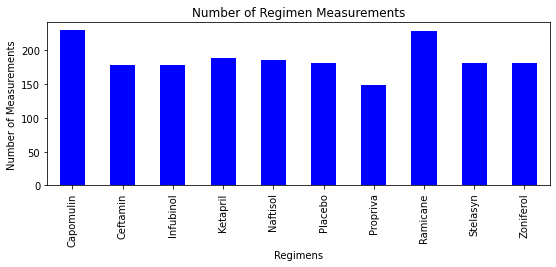

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_count.plot(kind="bar", color="blue", figsize=(9,3), width=0.5)

plt.title("Number of Regimen Measurements")
plt.xlabel("Regimens")
plt.ylabel("Number of Measurements")

plt.show()

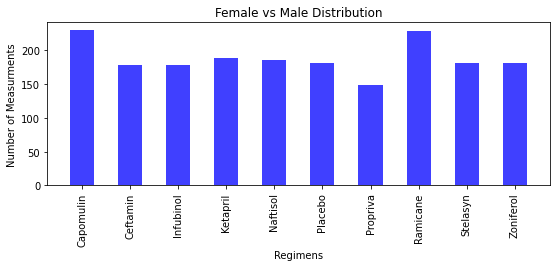

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Can either create the variable for the x-axis by taking grouped_summary_df.index.tolist().
# Or, just get the index of the grouped_summary_df (grouped_summary_df.index)
x_axis = grouped_summary_df.index
y_axis = total_count

plt.figure(figsize=(9,3))

plt.title("Female vs Male Distribution")
plt.xlabel("Regimens")
plt.ylabel("Number of Measurments")

plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center", width=0.5)
plt.xticks(x_axis, rotation="vertical")

plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = merge_df.groupby(["Sex"])
# sex_data.count()

In [20]:
sex_count = sex_data["Sex"].count()
# sex_count

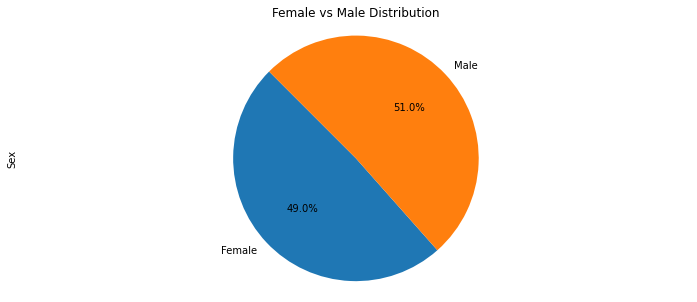

In [21]:
plt.figure(figsize=(12,5))

plt.title("Female vs Male Distribution")
sex_labels= sex_count.index

sex_count.plot(kind="pie", startangle=135, autopct="%1.1f%%", legend=False, labels=sex_labels)

plt.axis("equal") 
plt.show()

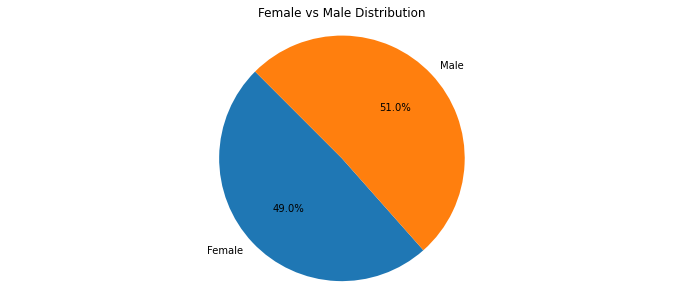

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_labels= ["Female", "Male"]
sex_labels= sex_count.index

plt.figure(figsize=(12,5))

plt.title("Female vs Male Distribution")
plt.pie(sex_count, labels=sex_labels, startangle=135, autopct="%1.1f%%")

plt.axis("equal") 
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start with the merged, clean df (original)
# Start by getting the last (greatest) timepoint for each mouse
# Create new dataframe from the max time value
# https://stackoverflow.com/questions/18879782/python-pandas-groupby-forloop-idxmax
max_timepoint=pd.DataFrame(merge_df.groupby(["Mouse ID"])["Timepoint"].max())
max_timepoint.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_timepoint = pd.merge(merge_df, max_timepoint.reset_index(), on=["Mouse ID", "Timepoint"], how="inner")
merged_max_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
# regimen_list = merged_max_timepoint["Drug Regimen"].unique().tolist()
# regimen_list

In [26]:
# Drop unwanted items (Keep: Capomulin, Ramicane, Infubinol, and Ceftamin)
# Step above must be run first
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# regimens

In [27]:
# Create empty list to fill with tumor vol data (for plotting)
regimen_values = []

In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimens:
    rows_df = merged_max_timepoint.loc[merged_max_timepoint["Drug Regimen"] == drug]

    # Add subset. Using the empty list, find the tumor volume for each regimen. 
    tumor_volume = rows_df["Tumor Volume (mm3)"]
    regimen_values.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds using quartiles
    # Sample at 5.3 Real-World Visualization with Matplotlib, see notes.
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The interquartile range of Tumor Volume for {drug} is: {iqr}")
    # print(f"The lower quartile of Tumor Volume for {drug} is {lowerq}")
    # print(f"The upper quartile of Tumor Volume for {drug} is: {upperq}")
    # print(f"The median of Tumor Volume for {drug} is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"The values below {lower_bound} could be outlier for {drug}")
    print(f"The values above {upper_bound} could be outlier for {drug}")

The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The values below 20.70456164999999 could be outlier for Capomulin
The values above 51.83201549 could be outlier for Capomulin
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The values below 17.912664470000003 could be outlier for Ramicane
The values above 54.30681135 could be outlier for Ramicane
The interquartile range of Tumor Volume for Infubinol is: 11.477135160000003
The values below 36.83290494999999 could be outlier for Infubinol
The values above 82.74144559000001 could be outlier for Infubinol
The interquartile range of Tumor Volume for Ceftamin is: 15.577752179999997
The values below 25.355449580000002 could be outlier for Ceftamin
The values above 87.66645829999999 could be outlier for Ceftamin


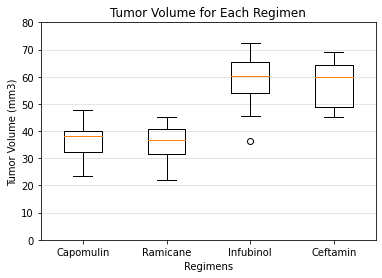

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://stackoverflow.com/questions/43573056/matplotlib-subplot-boxplot-hiding-some-axis-labels
xfig1, ax1 = plt.subplots()
ax1.yaxis.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
ax1.set_title("Tumor Volume for Each Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(regimens)
ax1.set_ylim(0,80)

ax1.set_xlabel("Regimens")
ax1.boxplot(regimen_values)
plt.show()

## Line and Scatter Plots

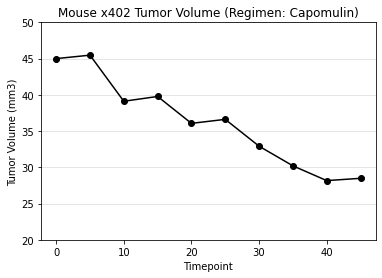

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify a mouse in merged_max_timepoint and put it as a variable
mouse = merge_df.loc[merge_df["Mouse ID"] == "x401"]
#mouse

#plt.yaxis.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.title("Mouse x402 Tumor Volume (Regimen: Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylim(20,50)
plt.grid(True, linestyle="-", axis ="y", which="major", color="gray", alpha=0.25)

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], color="black", marker="o")
plt.show()

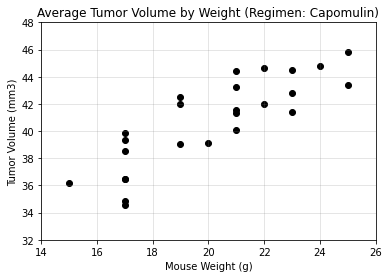

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Identify the Capomulin and then group by mouse id to find means.
cap = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
cap_ave = cap.groupby(["Mouse ID"]).mean()
# cap_ave

plt.title("Average Tumor Volume by Weight (Regimen: Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(32,48)
plt.xlim(14,26)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

plt.scatter(cap_ave["Weight (g)"], cap_ave["Tumor Volume (mm3)"], color="black", marker="o")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
r = sts.pearsonr(cap_ave["Weight (g)"], cap_ave["Tumor Volume (mm3)"])
r = round(r[0],2)

print(f"The correlation coefficient between the average tumor volume and mouse weight is {r}.")

The correlation coefficient between the average tumor volume and mouse weight is 0.84.


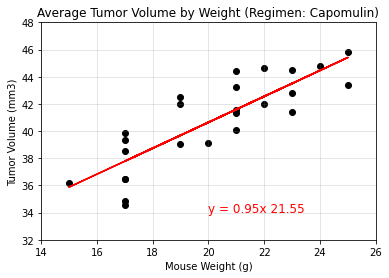

In [33]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_ave["Weight (g)"]
y_values = cap_ave["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title("Average Tumor Volume by Weight (Regimen: Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(32,48)
plt.xlim(14,26)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (20,34), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()